<a href="https://colab.research.google.com/github/Mehadi4021/Digital-Image-Processing_Lab_CSE438/blob/main/Experiment_No10_DIP_Lab_Day_10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Function to show multiple images side by side
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

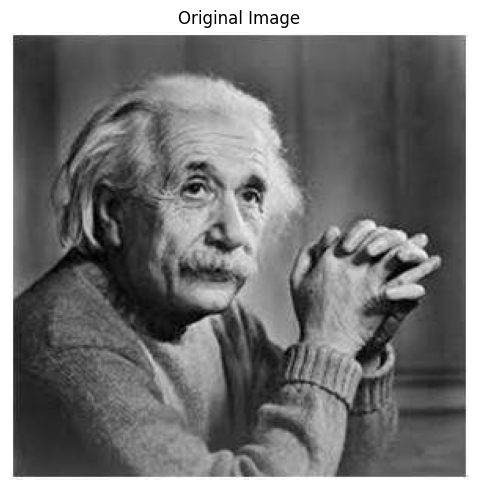

In [ ]:

img = cv2.imread('/content/drive/MyDrive/DIP_Lab/Day_9/Einstein.jpg', 0)  # 0 means load in grayscale

# Show the original image
show_images([img], ['Original Image'])


# Canny Edge Detection

Canny is an algorithm that helps us find **edges** in an image, which are the areas where the brightness changes sharply. These edges represent boundaries or important features in the image, like the outline of a shape, a face, or even text.

### 🔍 Canny Edge Detection in Simple Steps

Canny edge detection works in **5 main steps**:

---

### 1. **Convert Image to Grayscale**

First, the image is turned into a **grayscale image**. This means we only keep the brightness values and remove any color information. This simplifies the image because the edges can be detected in just the **brightness** (intensity) of the pixels.

Imagine the image is made up of shades from **black** to **white**. Each pixel now has a **brightness value** between 0 (black) and 255 (white).

---

### 2. **Apply Gaussian Blur (Smoothing)**

Next, we **smooth** the image using a technique called **Gaussian Blur**. This step helps to **reduce noise** (unwanted small changes) in the image. Without this step, noise in the image might be detected as edges, which isn't helpful.

Think of it like **blurring** the image a little, like looking through fog, so the small, random details are smoothed out.

---

### 3. **Find the Gradients (Changes in Brightness)**

Now, we want to find places where the brightness changes sharply, which we call **edges**.

We use something called a **gradient** to do this. A gradient is just a measure of how fast the brightness changes between two neighboring pixels. If the change is large, it's probably an edge.

The gradient is calculated in two directions:
- **Horizontal gradient** (left to right)
- **Vertical gradient** (top to bottom)

By calculating both, we can find edges in any direction.

---

### 4. **Non-Maximum Suppression (Thin the Edges)**

After we find the gradients, we need to **thin** the edges so they are clear and not too thick. This is where **Non-Maximum Suppression** comes in.

- For each pixel, we look at its gradient in the direction of the edge (horizontal or vertical).
- If the pixel has the strongest gradient value in its direction, it stays. Otherwise, it gets removed.

This step helps to create **thin lines** for the edges.

---

### 5. **Double Thresholding and Edge Tracking by Hysteresis**

This is where we decide which edges are **strong**, **weak**, or **not edges at all**.

- **High Threshold**: Pixels with a gradient above this value are considered **strong edges**.
- **Low Threshold**: Pixels with a gradient between the low and high thresholds are considered **weak edges**.
- **No Edge**: Pixels with gradients below the low threshold are **not edges**.

Once we’ve identified weak edges, we check if they are connected to strong edges. If a weak edge is next to a strong edge, it gets marked as part of the edge. Otherwise, it’s discarded.

---

### 🤖 The Result

After these steps, we get a **binary image** (black and white) where the **white areas** represent the **edges** in the image, and the **black areas** are everything else.

---

### 🧑‍💻 Canny Edge Detection Summary:

1. **Convert to Grayscale**: Remove color, keep brightness.
2. **Gaussian Blur**: Smooth the image to reduce noise.
3. **Calculate Gradients**: Find areas where brightness changes quickly.
4. **Non-Maximum Suppression**: Thin out the edges.
5. **Double Thresholding**: Mark strong edges and weak edges.
6. **Edge Tracking**: Connect weak edges to strong ones.

### 🔑 Why is Canny Special?

- **Multi-step process**: It’s a **robust method** for edge detection, using several techniques to get clear and accurate edges.
- **Noise reduction**: Gaussian blur helps reduce the effect of noise.
- **Edge continuity**: Weak edges connected to strong edges help form **continuous edges**.

---

In simple terms, the **Canny edge detector** helps us find the **important boundaries** in an image where the brightness changes a lot, and it does so by **smoothing**, **finding gradients**, and **linking edges together**.



# Canny Edge Detection (Manual)

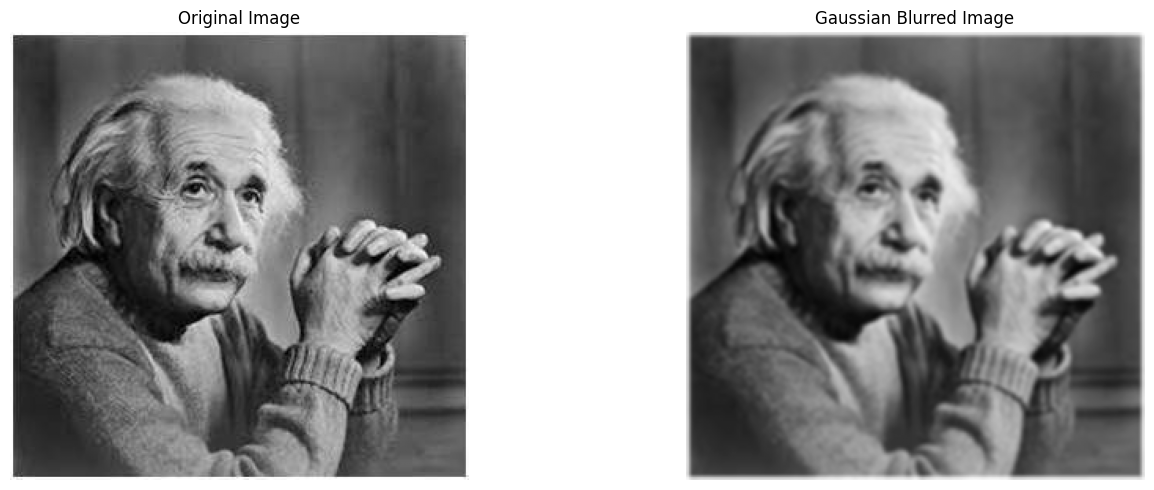

In [ ]:
#Gaussian blur
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

blurred = cv2.filter2D(img, -1, gaussian_kernel(5, 1.4))
show_images([img, blurred], ['Original Image', "Gaussian Blurred Image"])


In [ ]:
#Compute Gradient (Sobel filters)
# Sobel kernels
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Ix = cv2.filter2D(blurred, -1, Kx)
Iy = cv2.filter2D(blurred, -1, Ky)

# Gradient magnitude and direction
G = np.hypot(Ix, Iy)
G = G / G.max() * 255
theta = np.arctan2(Iy, Ix)


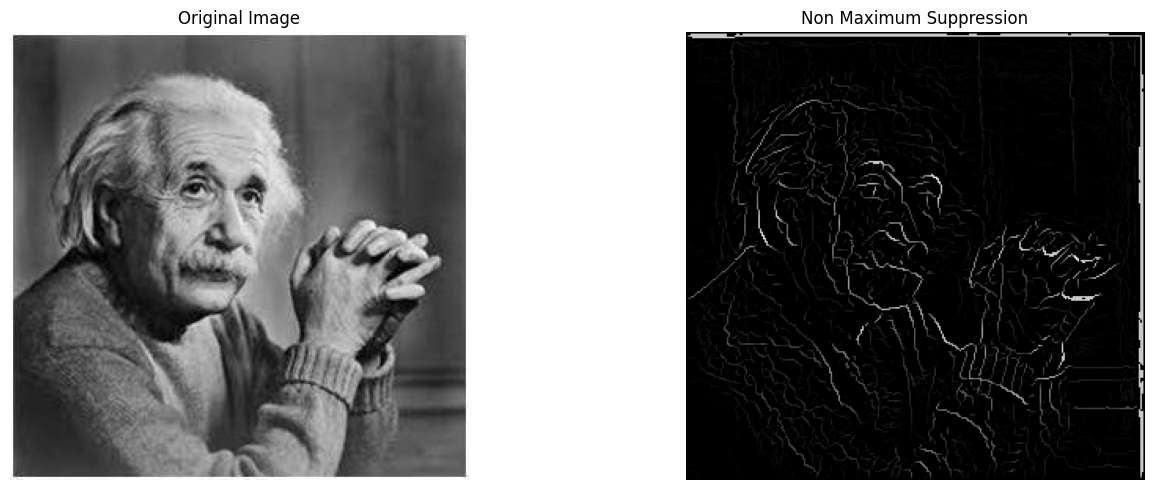

In [ ]:
#Non-Maximum Suppression
def non_max_suppression(G, theta):
    M, N = G.shape
    output = np.zeros((M,N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255
            # Angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            # Angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            # Angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = G[i+1, j]
                r = G[i-1, j]
            # Angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            if (G[i,j] >= q) and (G[i,j] >= r):
                output[i,j] = G[i,j]
            else:
                output[i,j] = 0
    return output

nms = non_max_suppression(G, theta)
show_images([img, nms], ['Original Image', "Non Maximum Suppression"])


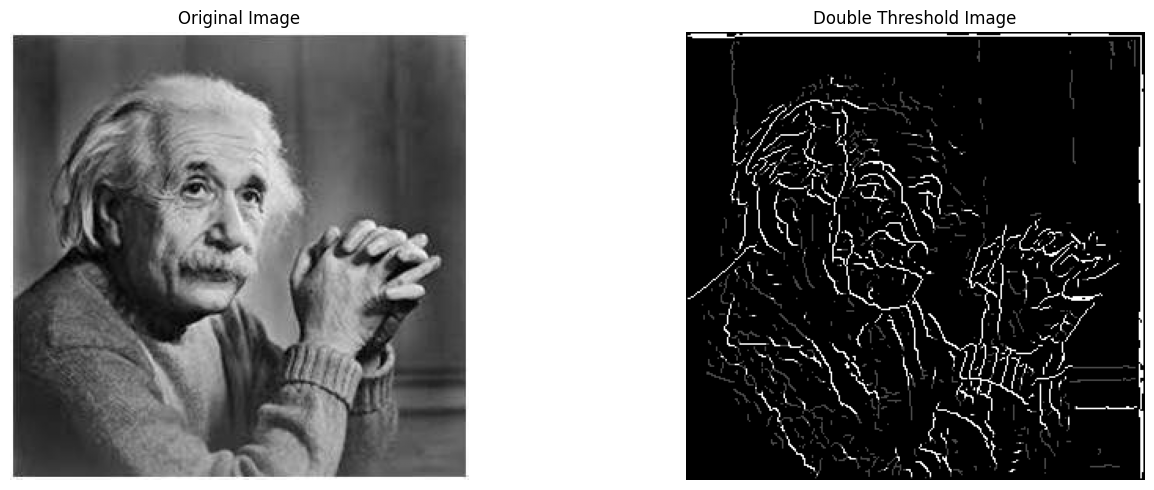

In [ ]:
# Double Threshold
def double_threshold(img, low, high):
    strong = 255
    weak = 75

    strong_i, strong_j = np.where(img >= high)
    weak_i, weak_j = np.where((img <= high) & (img >= low))

    result = np.zeros_like(img)
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result, weak, strong

dt_img, weak, strong = double_threshold(nms, 20, 40)
show_images([img, dt_img], ['Original Image', "Double Threshold Image"])


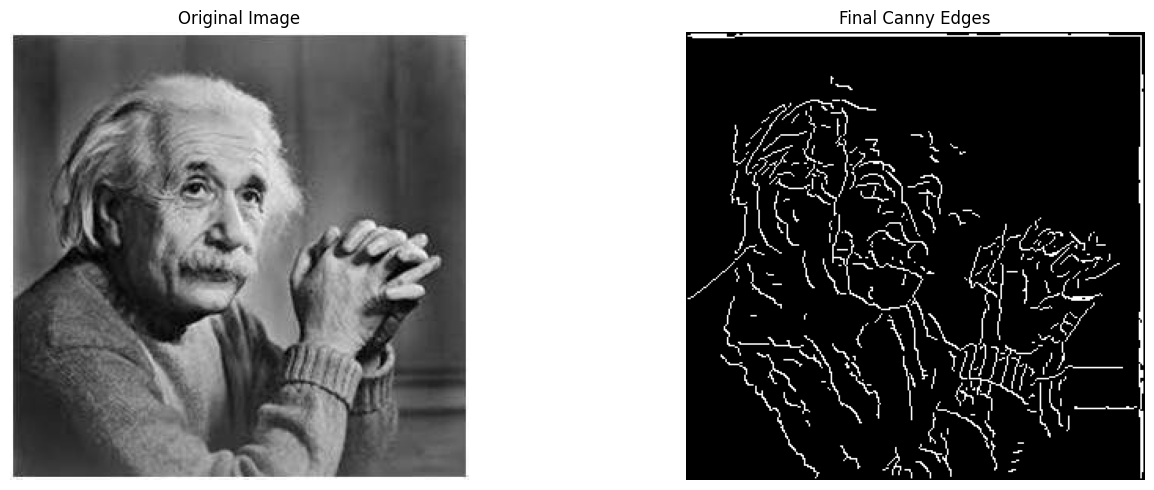

In [ ]:
#Edge Tracking by Hysteresis
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i,j] == weak:
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img

final_edges = hysteresis(dt_img, weak, strong)
show_images([img, final_edges], ['Original Image', "Final Canny Edges"])


# Canny Edge Detection (ReadyMade)

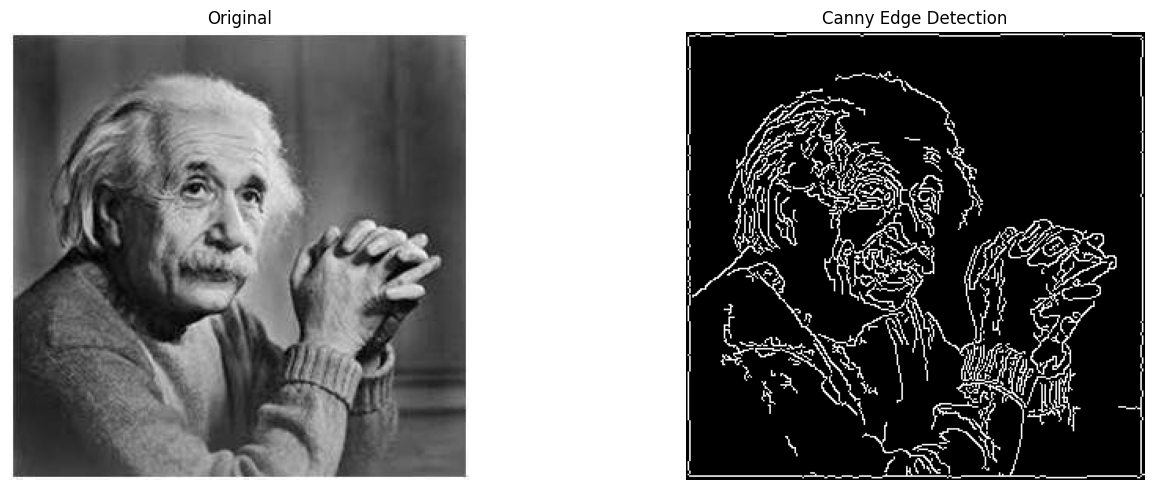

In [ ]:
# Apply Canny edge detection
# The two numbers are thresholds. You can try changing them!
edges = cv2.Canny(img, 100, 200)
#Pixels with gradient values greater than 100 but less than 200 will be considered weak edges.
#Pixels with gradient values greater than 200 will be considered strong edges.
# Show the result
show_images([img,edges], ['Original','Canny Edge Detection'])




##  **Morphological Image Processing**

Morphological operations are applied to **binary or grayscale images** for **shape-based processing** like removing noise, filling holes, detecting edges, etc.

### 📌 Basic Operations:

| Operation    | Description                            |
| ------------ | -------------------------------------- |
| **Erosion**  | Shrinks white regions                  |
| **Dilation** | Expands white regions                  |
| **Opening**  | Erosion → Dilation (removes noise)     |
| **Closing**  | Dilation → Erosion (fills small holes) |


---




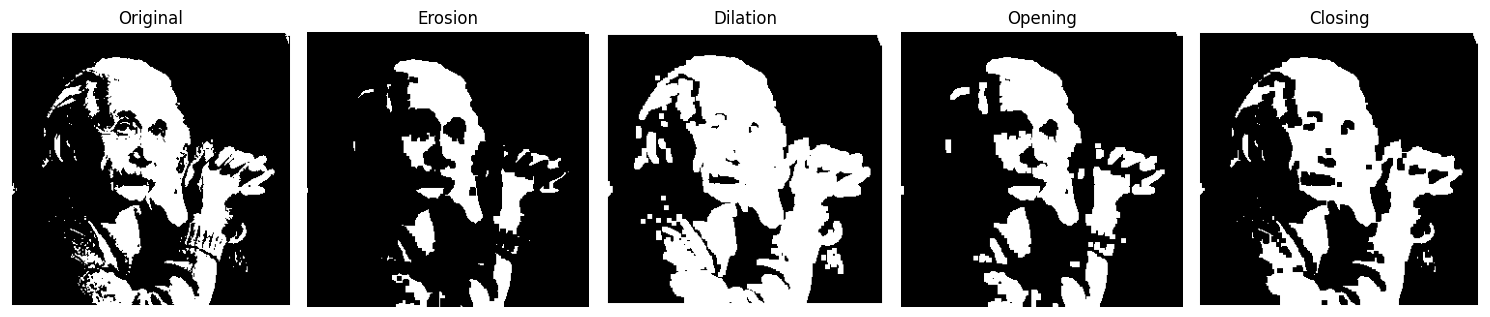

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load a binary or grayscale image
#img = cv2.imread('image.jpg', 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Define kernel
kernel = np.ones((5, 5), np.uint8)

# Erosion
erosion = cv2.erode(binary, kernel, iterations=1)

# Dilation
dilation = cv2.dilate(binary, kernel, iterations=1)

# Opening (remove noise)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing (fill holes)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display results
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [binary, erosion, dilation, opening, closing]
show_images(images, titles)

plt.tight_layout()
plt.show()


## 🗜️ 2. **Image Compression Techniques**

Image compression reduces the amount of data needed to represent an image. Two types:

* **Lossless:** No data lost (e.g., PNG, Huffman coding)
* **Lossy:** Some data lost (e.g., JPEG using DCT)

### ✅ Example 1: **Saving JPEG vs PNG**

```python
img = cv2.imread('image.jpg')

# Save as JPEG (lossy)
cv2.imwrite('compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])  # quality: 0–100

# Save as PNG (lossless)
cv2.imwrite('compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])  # compression: 0–9
```


## 🧠 Summary

| Topic                 | Use                                      |
| --------------------- | ---------------------------------------- |
| **Morphological Ops** | Shape-based noise removal, edge cleaning |
| **Compression**       | Reduce file size (JPEG, DCT, PNG)        |

---


In [ ]:

img = cv2.imread('/content/drive/MyDrive/DIP_Lab/Day_2/dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Save as JPEG (lossy)
cv2.imwrite('lossy.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])

# Save as JPEG (lossless)
cv2.imwrite('lossless.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

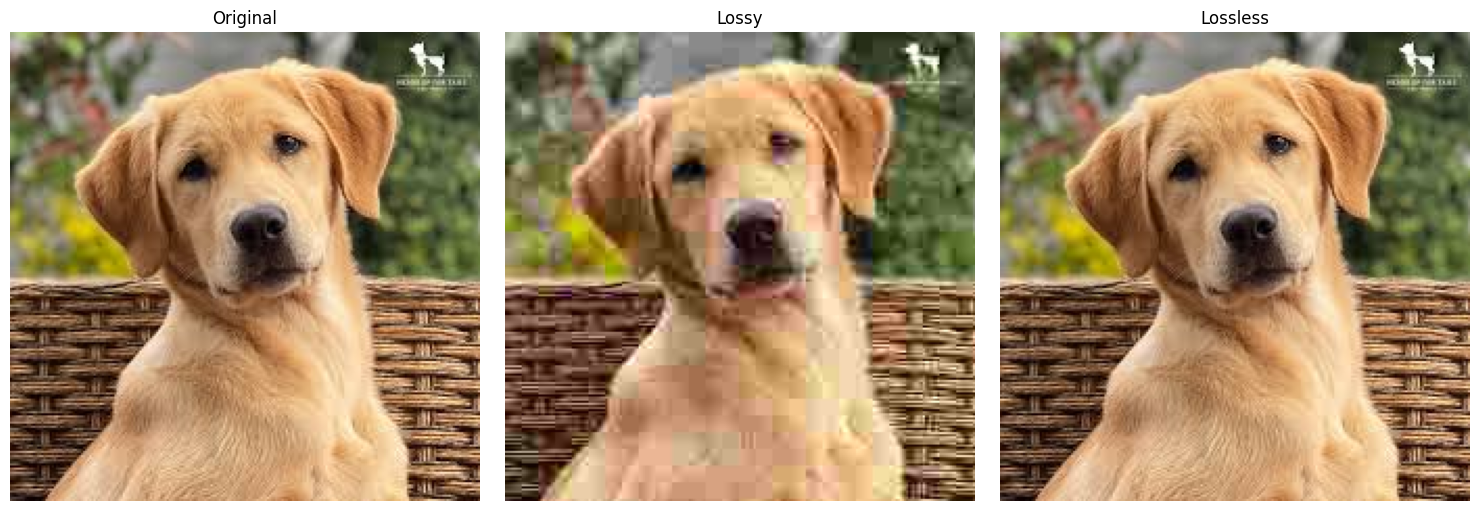

In [ ]:
lossy = cv2.imread('/content/lossy.jpg')
lossless = cv2.imread('/content/lossless.png')

show_images([img,lossy,lossless], ["Original","Lossy","Lossless"])